## how


In [ ]:
df['user_defined_tags'].value_counts()

user_defined_tags
Simulation, Management               29
FPS, Action                          27
Action, FPS                          25
Simulation                           23
Cute, Puzzle                         22
                                     ..
Strategy, RPG, Adventure              1
Action, RPG, Adventure, Combat        1
Action, RPG, Simulation               1
Platformer, 2D, Action, Adventure     1
Action, Simulation, RPG, Driving      1
Name: count, Length: 1649, dtype: int64

In [ ]:
df['user_defined_tags'] = df['user_defined_tags'].apply(lambda x: x.split(', '))

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
tags_encoded = pd.DataFrame(mlb.fit_transform(df['user_defined_tags']), columns=mlb.classes_, index=df.index)

df = df.join(tags_encoded)


In [ ]:
tags_encoded.columns

Index(['', '2.5D', '2D', 'Action', 'Adventure', 'Adventure ,RPG', 'Anime',
       'Automation', 'Building', 'CRPG', 'Card Game', 'Combat', 'Crafting',
       'Cute', 'Driving', 'Early Access', 'FPS', 'FPS ,RPG', 'Fantasy',
       'Fighting', 'Horror', 'JRPG', 'MMORPG', 'Management', 'Open World',
       'Pixel Graphics', 'Platformer', 'Puzzle', 'RPG', 'RPG,', 'Realistic',
       'Roguelike', 'Sandbox', 'Sexual Content', 'Shooter', 'Simulation',
       'Simulation,', 'Souls-like', 'Sports', 'Stealth', 'Story Rich',
       'Strategy', 'Survival', 'Tactical', 'Tactical,', 'Turn-Based',
       'Visual Novel', 'War'],
      dtype='object')

In [ ]:
# Fitur numerik + kategorikal yang sudah diolah
feature_cols = [
    'reviews_like_rate', 'all_reviews_number', 'price',
    'age_restriction', 'rating', 'difficulty', 'length'
] + list(mlb.classes_)  # ← ini semua tag/genre hasil one-hot

X = df[feature_cols]
y = df['is_popular']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.94      0.97      0.95       344
        True       0.91      0.83      0.87       132

    accuracy                           0.93       476
   macro avg       0.92      0.90      0.91       476
weighted avg       0.93      0.93      0.93       476



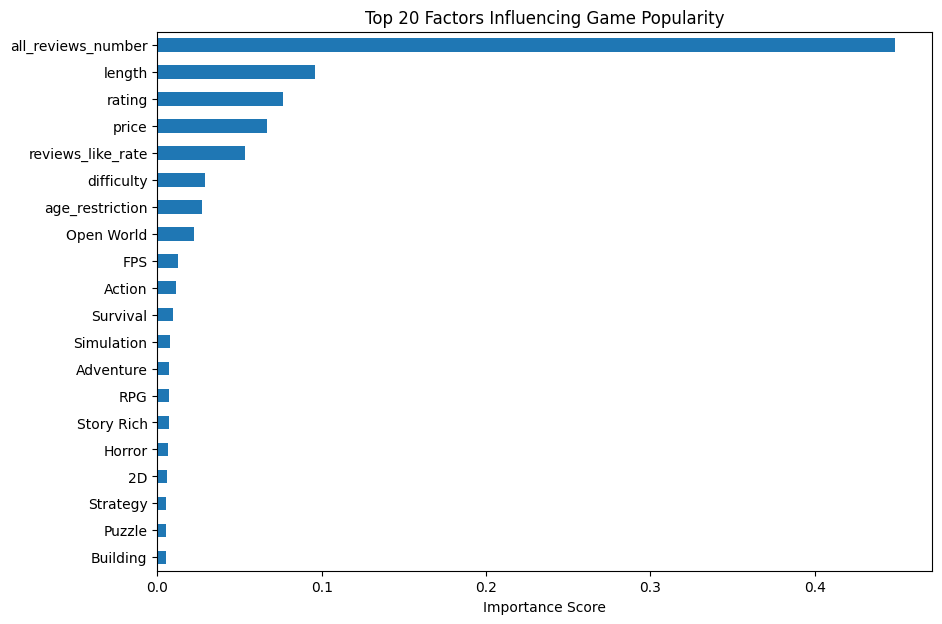

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 7))
top_features.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Factors Influencing Game Popularity")
plt.xlabel("Importance Score")
plt.show()
